In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from collections import OrderedDict
from jupyterthemes import jtplot
jtplot.style(theme='chesterish',ticks=True, grid=True, figsize=(12, 7),context='poster',fscale=1.5, spines=True, gridlines='--')
%matplotlib inline

In [21]:
def DataPro(data):
    lines=data.splitlines()
    TimeList=[float(lines[i].split()[0]) for i in range(len(lines)-1)][1000:]
    DataList=[float(lines[i].split()[1]) for i in range(len(lines)-1)][1000:]
    return TimeList,DataList

def DataStatis(results):
    statislist=OrderedDict()
    for name,result in results.items():
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),np.array(result[1])
        Mean=np.mean(DataList)
        Std=np.std(DataList)
        PpV=np.amax(DataList)-np.amin(DataList)
        print("file'%s'"%name)
        print('Mean value is ',Mean)
        print('STD value is ',Std)
        print('Peak-Peak value is ',PpV)
        print('Noise-to-Signal ratio is ',Std/Mean*(10**6),' ppm\n')
        statislist[name]=[Mean,Std,PpV]
    return statislist

def ShowData(results,sf=False,filename='outputdata.png'):
    plt.figure(figsize=(14,8))
    #plt.ylim(9.61075,9.612)
    plt.xlim(0,)
    plt.title('Data')
    plt.xlabel('time/s')
    plt.ylabel('Grad_Hall/V')
    plt.grid(True)
    for name,result in results.items():
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),np.array(result[1])
        plt.plot(TimeList,DataList-np.mean(DataList),linewidth=0.9,label=name)
        plt.legend()
    if sf==True:
        plt.savefig(filename,type='png')
    
    
def FileChosen(folder):
    FilesPre=os.listdir(folder)
    Files=[]
    for filename in FilesPre:
        if os.path.splitext(filename)[1]=='.xls':
            Files.append(filename)
    datalist=OrderedDict()
    FileList=[os.path.join(folder,Files[i]) for i in range(len(Files))]
    for i,name in enumerate(FileList):
        print(str(i)+'. '+name)
    try:
        print('Which files do you want to choose?(enter n to end)\n')
        while True:
            ChosenFile=input()
            if ChosenFile=='n':
                print('End!')
                break
            elif ChosenFile=='all':
                print('You select all files!!Processing....')
                for i in range(len(FileList)):
                    with open(FileList[i]) as f:
                        data=f.read()
                    datalist[Files[i]]=data
                break
            elif (int(ChosenFile)<0) or (int(ChosenFile)>(len(Files)-1)):
                print('Out of Range,Pls input legal number.')
            else:
                ChosenFile=int(ChosenFile)
                with open(FileList[ChosenFile]) as f:
                    data=f.read()
                datalist[Files[ChosenFile]]=data
    except:
        print('Wrong Input!!Please restart again.')
    finally:
        pass
    return datalist

def FFTShow(results,xm=5000,sf=False,filename='outputdata.png'):
    plt.figure(figsize=(14,8))
    plt.ylim(-160,-80)
    plt.xlabel('Freq/Hz')
    plt.ylabel('RIN/(dB/Hz)')
    plt.grid(True)
    plt.title('FFT Result')
    for name,result in results.items():
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),np.array(result[1])
        grossfft=20*np.log10(2*abs(np.fft.rfft(DataList))/len(DataList))
        grossfft[0]=grossfft[0]-20*np.log10(2)
        #print(grossfft)
        fftresult=grossfft-np.amax(grossfft)
        #print(len(fftresult))
        frerange=np.linspace(0,0.5/(TimeList[2]-TimeList[1]),len(fftresult))
        if xm>0.5/(TimeList[2]-TimeList[1]):
            plt.xlim(0,0.5/(TimeList[2]-TimeList[1]))
        else:
            plt.xlim(0,xm)
        plt.plot(frerange,fftresult,linewidth=1,label=name)
        plt.legend()
    if sf==True:
        plt.savefig(filename,type='png')

## Choose file

In [34]:
data1=FileChosen('FFTdata/20180326/')
# data2=FileChosen('FFTdata/Comp/worse/')
# data3=FileChosen('FFTdata/Comp/better/')
# data4=FileChosen('FFTdata/Comp/worse/')

0. FFTdata/20180326/GradHall_2018-03-26-21-02-12.xls
1. FFTdata/20180326/GradHall_2018-03-26-17-43-50.xls
2. FFTdata/20180326/GradHall_2018-03-26-17-44-04.xls
3. FFTdata/20180326/GradHall_2018-03-26-17-43-23.xls
4. FFTdata/20180326/GradHall_2018-03-26-17-43-37.xls
5. FFTdata/20180326/GradHall_2018-03-26-18-10-31.xls
6. FFTdata/20180326/OP177WithCapFinal.xls
Which files do you want to choose?(enter n to end)

0
1
6
n
End!


In [35]:
#print(data1)
for key in data1.keys():
    print(key)

# for key in data2.keys():
#     print(key)

GradHall_2018-03-26-21-02-12.xls
GradHall_2018-03-26-17-43-50.xls
OP177WithCapFinal.xls


## Data Statistic

In [36]:
#print('result1:')
_=DataStatis(data1)
#print('result2:')
# _=DataStatis(data2)
# _=DataStatis(data3)
# _=DataStatis(data4)

file'GradHall_2018-03-26-21-02-12.xls'
Mean value is  9.54072545252
STD value is  6.30667617213e-05
Peak-Peak value is  0.00043909
Noise-to-Signal ratio is  6.61026900262  ppm

file'GradHall_2018-03-26-17-43-50.xls'
Mean value is  9.54479799835
STD value is  0.000605845329672
Peak-Peak value is  0.00332399
Noise-to-Signal ratio is  63.4738765322  ppm

file'OP177WithCapFinal.xls'
Mean value is  9.53833471012
STD value is  5.56333702734e-05
Peak-Peak value is  0.000395529999999
Noise-to-Signal ratio is  5.83260830786  ppm



## Show Data

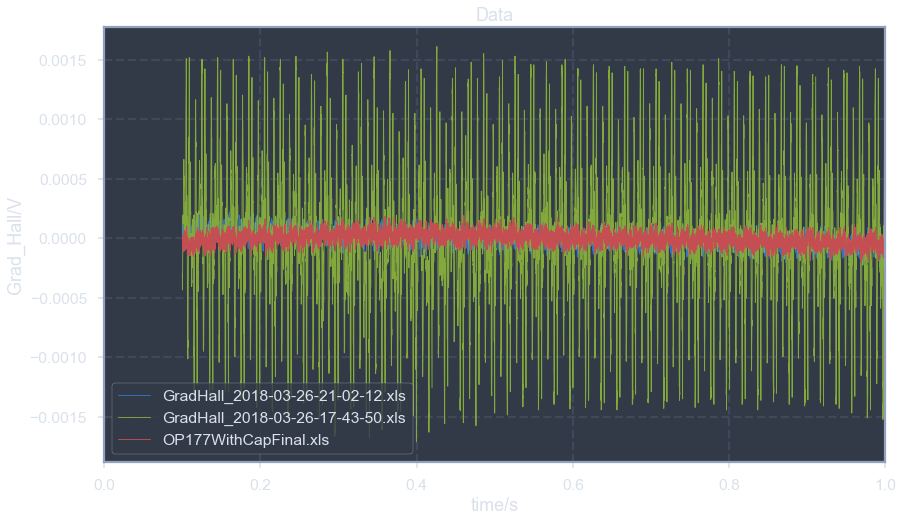

In [37]:
savefig=False #选择是否保存文件
filename1='20180207OpComData.pdf'
#filename2='data2.pdf'
ShowData(data1,sf=savefig,filename=filename1)
# ShowData(data2,sf=savefig,filename=filename2)
# ShowData(data3,sf=savefig,filename=filename1)
# ShowData(data4,sf=savefig,filename=filename2)

## Show FFT Results

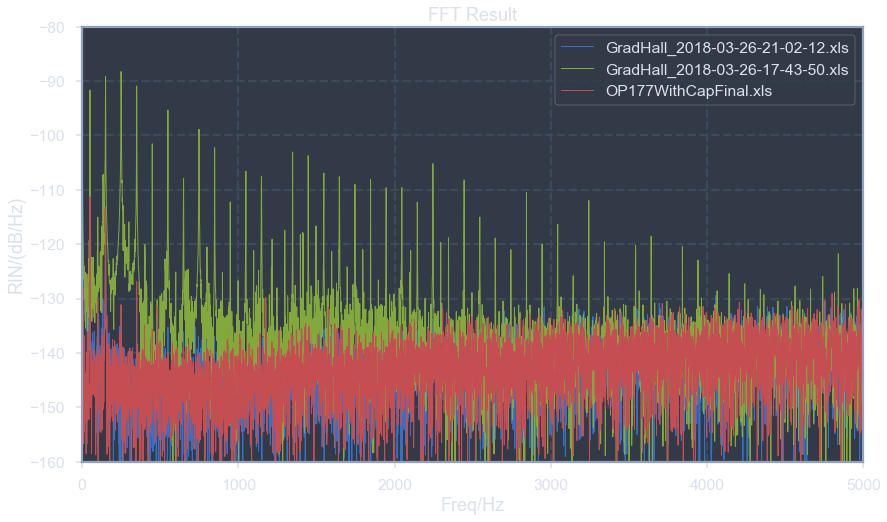

In [38]:
savefig=False #选择是否保存文件
filename1='20180207OpCom5kHz.pdf'
filename2='AfternoonWorseComp5kHz.pdf'
FFTShow(data1,5000,sf=savefig,filename=filename1)
# FFTShow(data2,5000,sf=savefig,filename=filename2)
# FFTShow(data3,5000,sf=savefig,filename=filename1)
# FFTShow(data4,5000,sf=savefig,filename=filename2)

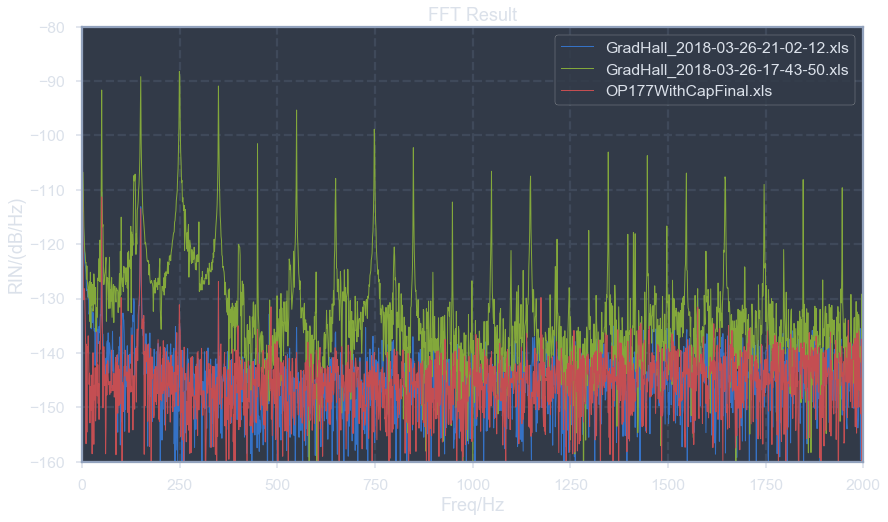

In [39]:
savefig=False #选择是否保存文件
filename1='20180207OpCom2kHz.pdf'
filename2='AfternoonWorseComp2kHz.pdf'
FFTShow(data1,2000,sf=savefig,filename=filename1)
# FFTShow(data2,2000,sf=savefig,filename=filename2)
# FFTShow(data3,2000,sf=savefig,filename=filename1)
# FFTShow(data4,2000,sf=savefig,filename=filename2)

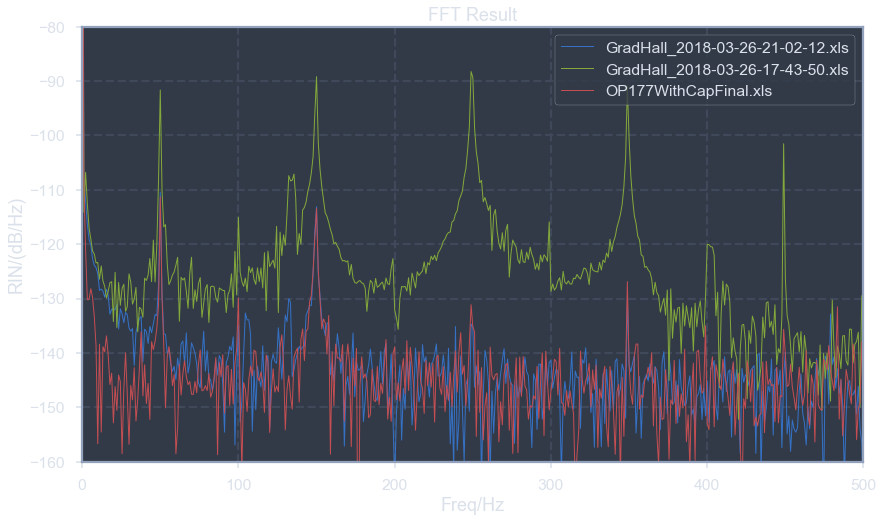

In [40]:
savefig=False #选择是否保存文件
filename1='20180207OpCom500Hz.pdf'
filename2='WorseComp500Hz.pdf'
FFTShow(data1,500,sf=savefig,filename=filename1)
# FFTShow(data2,500,sf=savefig,filename=filename2)
# FFTShow(data3,500,sf=savefig,filename=filename1)
# FFTShow(data4,500,sf=savefig,filename=filename2)

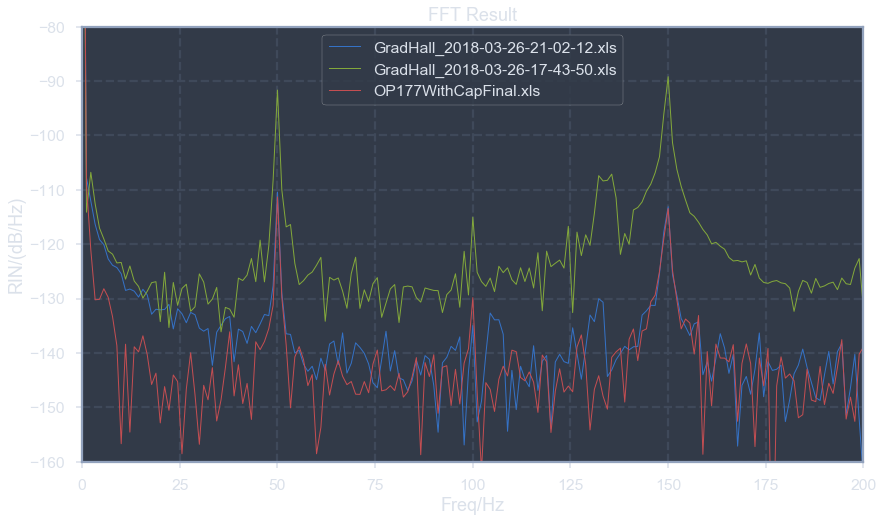

In [41]:
savefig=False #选择是否保存文件
filename1='20180207OpCom200Hz.pdf'
filename2='WorseComp200Hz.pdf'
FFTShow(data1,200,sf=savefig,filename=filename1)
# FFTShow(data2,200,sf=savefig,filename=filename2)
# FFTShow(data3,200,sf=savefig,filename=filename1)
# FFTShow(data4,200,sf=savefig,filename=filename2)

0. FFTdata/Comp/20180207OP177/IGBTNewMod_Test_2018-02-07-11-55-22.xls
1. FFTdata/Comp/20180207OP177/IGBTNewMod_Test_2018-02-07-11-54-56.xls
2. FFTdata/Comp/20180207OP177/IGBTNewMod_Test_2018-02-07-11-54-43.xls
3. FFTdata/Comp/20180207OP177/IGBTNewMod_Test_2018-02-07-11-56-26.xls
4. FFTdata/Comp/20180207OP177/IGBTNewMod_Test_2018-02-07-11-54-30.xls
Which files do you want to choose?(enter n to end)

all
You select all files!!Processing....


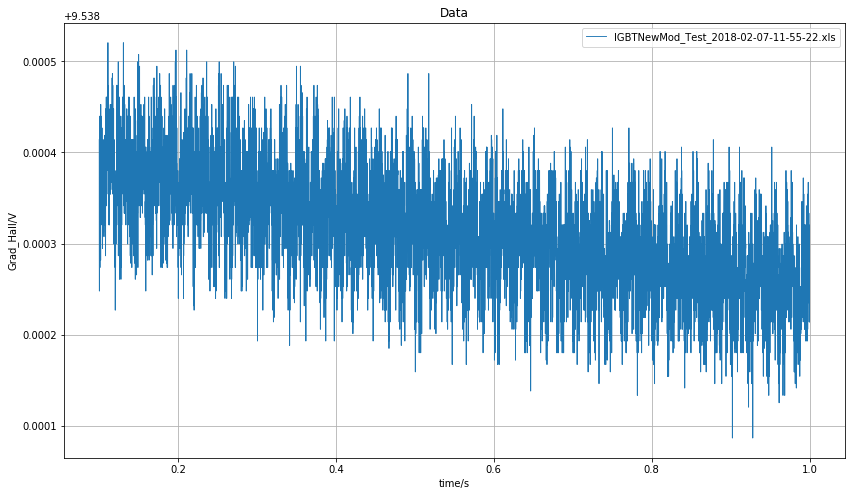

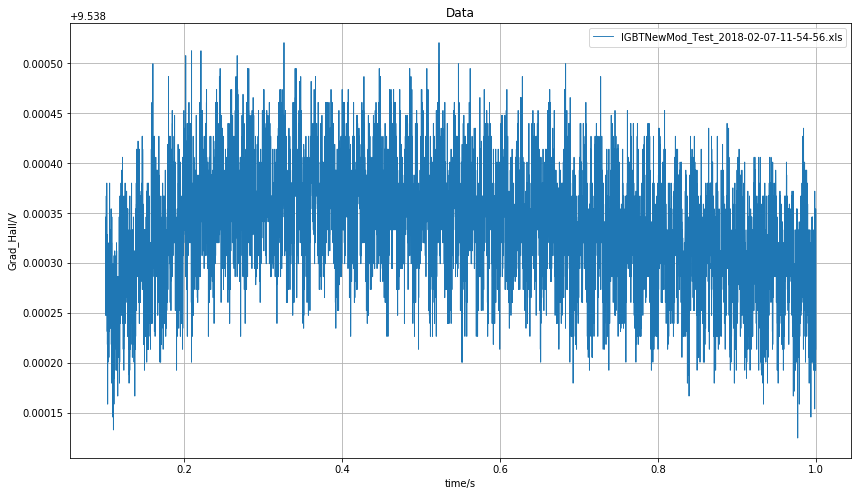

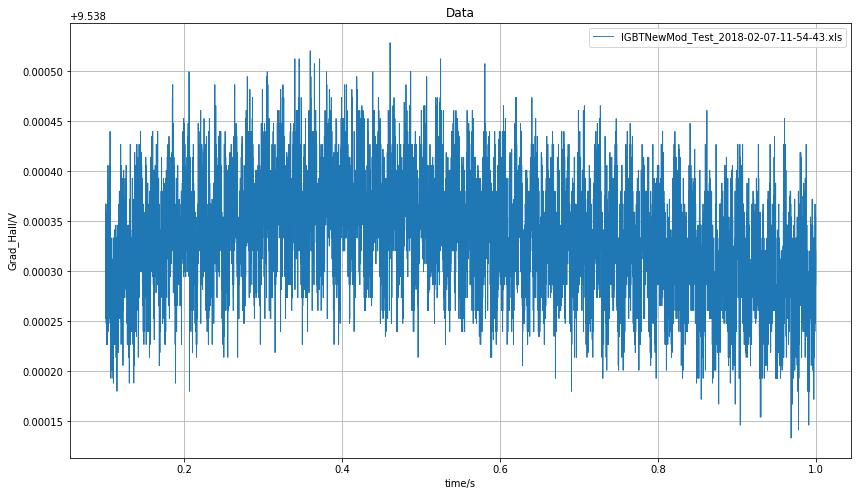

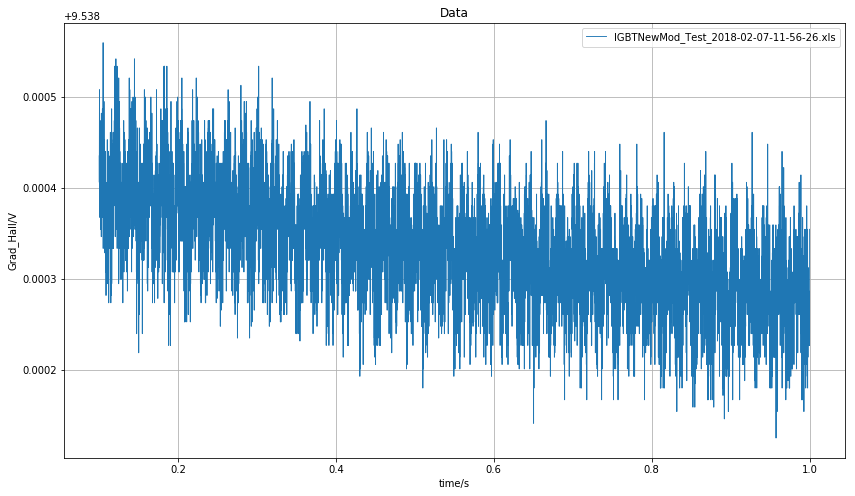

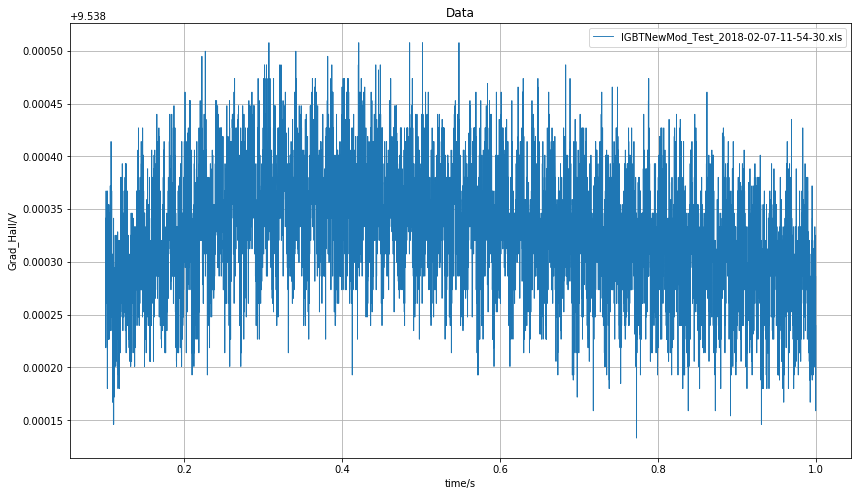

In [14]:
results=FileChosen('FFTdata/Comp/20180207OP177/')
for name,result in results.items():
        result=DataPro(result)
        TimeList,DataList=np.array(result[0]),np.array(result[1])
        plt.figure(figsize=(14,8))
        #plt.ylim(9.61075,9.612)
        #plt.xlim(TimeList[0],TimeList[-1])
        plt.title('Data')
        plt.xlabel('time/s')
        plt.ylabel('Grad_Hall/V')
        plt.grid(True)
        plt.plot(TimeList,DataList,linewidth=0.9,label=name)
        plt.legend()